# Problem set 1 - Fixed Income Derivatives 


# Problem 1 - Mathematical tasks 


# Problem 2  


In [368]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Problem a) Set up the cash flow matrix given the information.

In [435]:
# set up the bond prices and cash flows
L_3M, L_6M = [0.01570161, 0.01980204] # libor rates 
pi = np.array([102.33689177,104.80430234,105.1615306,105.6581905,104.02899992,101.82604116]) # bond prices
K = 100 # principal
T = np.array([0, 0.25, 0.5, 0.75, 1, 1.25 ,1.5 ,1.75 ,2]) # Time to maturity

N = 6 # number of bonds
M = 9 # number of periods
# We set up the cash flow matrix with the information. The matrix is a 9 column matrix with 6 rows because there are 6 bonds and 9 periods considered.
# for instance the last bond pays in the first year at the beginning and then again the beginning of next year and then matures on the end of the year.

# cashflow matrix
C = np.zeros((N,M))
C[0] = [0.25*K*0.04,0.25*K*0.04,0.25*K*0.04,0.25*K*0.04,0.25*K*0.04+K,0,0,0,0] # bond 1 maturing on 30 december 2020 and pays quarterly simple coupons of 4% annually
C[1] = [0.5*K*0.05,0,0.5*K*0.05,0,0.5*K*0.05+K,0,0,0,0] # bond 2 maturing on 30 december 2020 and pays semi-annual simple coupons of 5% annually
C[2] = [0.5*0.05*K,0,0.5*0.05*K,0,0.5*0.05*K,0,0.5*0.05*K+K,0,0] # bond 3 maturing on 30 june 2021 and pays semi-annual simple coupons of 5% annually
C[3] = [0.25*K*0.06,0.25*K*0.06,0.25*K*0.06,0.25*K*0.06,0.25*K*0.06,0.25*K*0.06,0.25*K*0.06+K,0,0] # bond 4 maturing on 30 june 2021 and pays quarterly simple coupons of 6% annually
C[4] = [0.25*K*0.05,0.25*K*0.05,0.25*K*0.05,0.25*K*0.05,0.25*K*0.05,0.25*K*0.05,0.25*K*0.05,0.25*K*0.05,0.25*K*0.05+K] # bond 5 maturing on 30 december 2021 and pays quarterly simple coupons of 5% annually
C[5] = [1*K*0.03,0,0,0,1*K*0.03,0,0,0,1*K*0.03+K] # bond 6 maturing on 30 December 2021 and pays annual simple coupons of 3% annually





LinAlgError: Last 2 dimensions of the array must be square

### Problem b) Find the vector of zero coupon prices for all the times that you can based on the above information and find the term structure of continuously compounded zero coupon spot rates (the yield curve). Report the results and plot both curves in an appropriate diagram.


Zero Coupon prices 
 [1.         0.99608995 0.99019605 0.982703   0.97393963 0.96418421
 0.95367016 0.94259166 0.93110895]

Continously compounded spot rates R 
 [       inf 0.01567087 0.01970465 0.02326445 0.02640596 0.02917833
 0.03162494 0.03378407 0.03568949]



/var/folders/1_/5z1myy9d37n8tytwhtd8c0000000gn/T/ipykernel_26423/913459063.py:26: RuntimeWarning: divide by zero encountered in divide
  R = -np.log(Zero_coupon_prices)/T


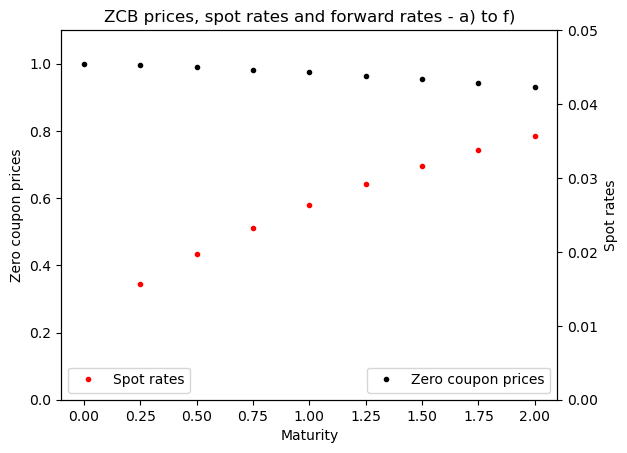

In [416]:
# L_3M/4: The 3-month LIBOR rate is annualized, so to get the rate for a 3-month period (which is 1/4 of a year), you divide the annual rate by 4.
# L_6M/2: The 6-month LIBOR rate is annualized, so to get the rate for a 6-month period (which is 1/2 of a year), you divide the annual rate by 2.

# Optional: Include LIBOR fixings as additional rows
C_LIBOR = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0], # This represents the present time (time 0), where the cash flow is 1 (the principal).
    [0, 1 + L_3M/4, 0, 0, 0, 0, 0, 0, 0], # This represents the cash flow at the end of the first quarter (0.25 years), where the cash flow includes the principal plus the interest accrued over 3 months.
    [0, 0, 1 + L_6M/2, 0, 0, 0, 0, 0, 0] # This represents the cash flow at the end of the first half-year (0.5 years), where the cash flow includes the principal plus the interest accrued over 6 months.
])

# Combine LIBOR fixings with the original cash flow matrix
C_combined = np.vstack((C_LIBOR, C))


# Extend the bond prices vector to include the LIBOR fixings
pi_extended = np.hstack((np.ones(3), pi))


# Solve for zero-coupon bond prices
Zero_coupon_prices = np.linalg.solve(C_combined, pi_extended)

# Print the result
print(f'Zero Coupon prices \n {Zero_coupon_prices}\n')

# find the continously compounded spot rates R 
R = -np.log(Zero_coupon_prices)/T
print(f'Continously compounded spot rates R \n {R}\n')


# Plotting ZCB prices, spot rates, and forward rates
fig, ax1 = plt.subplots()

# Plot ZCB prices on the right axis
ax1.plot(T, Zero_coupon_prices, 'k.', label="Zero coupon prices")
ax1.set_ylabel('Zero coupon prices')
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('Maturity')

ax2 = ax1.twinx()
ax2.plot(T, R, 'r.', label="Spot rates")
ax2.set_ylabel('Spot rates')
ax2.set_ylim(0, 0.05)
# Title and legends
plt.title('ZCB prices, spot rates and forward rates - a) to f)')
ax1.legend(loc="lower right")
ax2.legend(loc="lower left")

### c) Find the 3M forward rates and plot them in the figure in b)
#### 

Continuously compounded 3M forward rates f 
 [0.         0.01567087 0.02373843 0.03038404 0.03583049 0.04026783
 0.04385799 0.04673881 0.04902746]



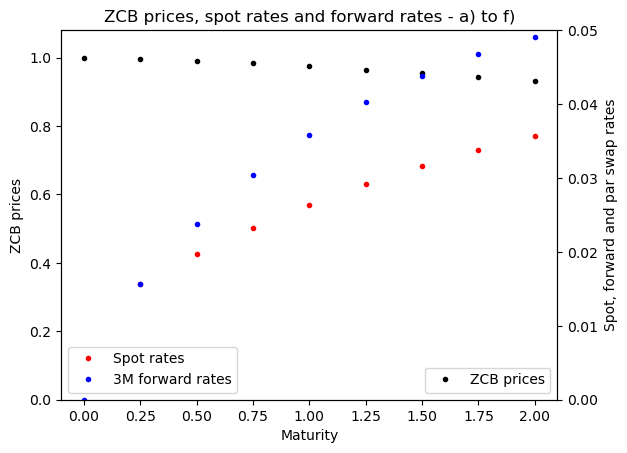

In [415]:
# find the 3M forward rates f

# Calculate continuously compounded 3M forward rates f
f = np.zeros(len(T))
for i in range(1, len(T)):
    f[i] = -(np.log(Zero_coupon_prices[i])-np.log(Zero_coupon_prices[i-1])) / (T[i]-T[i-1])
print(f'Continuously compounded 3M forward rates f \n {f}\n')

# Plotting ZCB prices, spot rates, and forward rates
fig, ax1 = plt.subplots()

# Plot ZCB prices on the right axis
ax1.plot(T, Zero_coupon_prices, 'k.', label="ZCB prices")
ax1.set_ylabel('ZCB prices')
ax1.set_ylim(0, 1.08)
ax1.set_xlabel('Maturity')

# Create another axis for the spot and forward rates on the left
ax2 = ax1.twinx()
ax2.plot(T, R, 'r.', label="Spot rates")
ax2.plot(T, f, 'b.', label="3M forward rates")
ax2.set_ylabel('Spot Rates and 3M Forward Rates')
ax2.set_ylabel('Spot, forward and par swap rates')
ax2.set_ylim(0, 0.05)

# Title and legends
plt.title('ZCB prices, spot rates and forward rates - a) to f)')
ax1.legend(loc="lower right")
ax2.legend(loc="lower left")

### d) Find the price of a 2 year floating rate bullet note with principal 100 paying 6M LIBOR issued today
####  


The price of the floating rate bond with principal 100 issued today will always be equal to the principal. Hence price is 100

### e) Find the par swap rate for a 2-year interest rate swap paying semi-annual fixed coupons at annual rate R to the ’receiver’ and quarterly 3M LIBOR to the ’payer’ issued today.


2-year par swap rate: 0.03579764668249575


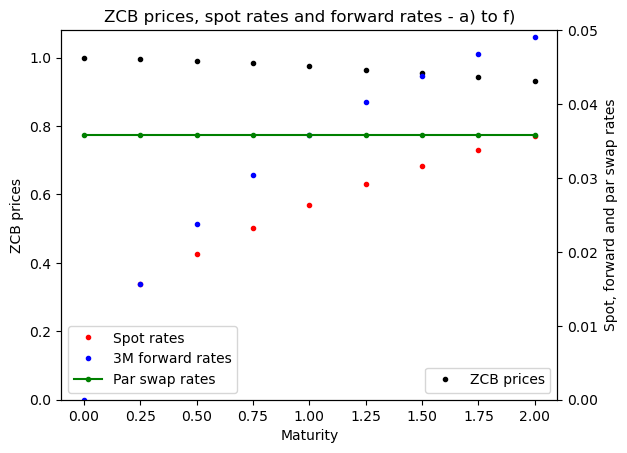

In [250]:
# finding the par swap rates for a 2 year interest rate swap with semi-annual payments fixed coupons at annual rate R to the receiver and quarterly 3M libor payments to the payer
# The par swap rate is the fixed rate that makes the swap have a zero value at inception. In other words, it is the rate that makes the present value of the fixed leg equal to the present value of the floating leg.

T_fixed = np.array([0.5, 1.0, 1.5, 2.0])  # Payment periods for the fixed leg (semi-annual payments)
P = np.array([Zero_coupon_prices[2], Zero_coupon_prices[4] ,Zero_coupon_prices[6] ,Zero_coupon_prices[-1]])  # ZCB prices (p(0, T_i))

# Accrual periods (for semi-annual payments, each accrual period is 0.5)
alpha = np.array([0.5, 0.5, 0.5, 0.5])

# Calculate the accrual factor (denominator)
accrual_factor = np.sum(alpha * P)

# Calculate the numerator (1 - p(0, T_N))
numerator = 1 - P[-1]

# Calculate the par swap rate
par_swap_rate = numerator / accrual_factor

print(f"2-year par swap rate: {par_swap_rate:.17f}")

# Plotting ZCB prices, spot rates, and forward rates and par swap rates
fig, ax1 = plt.subplots()

# Plot ZCB prices on the right axis
ax1.plot(T, Zero_coupon_prices, 'k.', label="ZCB prices")
ax1.set_ylabel('ZCB prices')
ax1.set_ylim(0, 1.08)
ax1.set_xlabel('Maturity')

# Create another axis for the spot and forward rates on the left
ax2 = ax1.twinx()
ax2.plot(T, R, 'r.', label="Spot rates")
ax2.plot(T, f, 'b.', label="3M forward rates")
ax2.plot(T, np.full(len(T), par_swap_rate), 'g.', label="Par swap rates", linestyle='solid')
ax2.set_ylabel('Spot Rates and 3M Forward Rates')
ax2.set_ylabel('Spot, forward and par swap rates')
ax2.set_ylim(0, 0.05)

# Title and legends
plt.title('ZCB prices, spot rates and forward rates - a) to f)')
ax1.legend(loc="lower right")
ax2.legend(loc="lower left")

### f) Compare the par swap rate to the forward rates you computed in c)
### 
The par swap rate is a weighted average of the forward rates on the floating leg which in this case
is the 3M forward rates computed and shown in the plot above.

### g) Set up a system of equations including the interest rate swap to compute zero coupon bond prices. You should now have a system with more equations than unknowns.


###### Row 1: This row corresponds to a zero-coupon bond maturing on March 30, 2020, at time T=2/12
###### T=2/12 (i.e., 2 months after the present time, which is January 30, 2020). The bond pays 1 unit of cash (100% of its face value) at maturity, which is why the entry at T=2/12 T=2/12 (the first column) is 1. All other entries are 0, because there are no payments at any other time points.


###### Row 2: This row corresponds to a zero-coupon bond maturing on June 30, 2020, at time T=5/12
###### T=5/12 (i.e., 5 months after the present time). The bond pays 1 unit of cash (100% of its face value) at maturity, which is why the entry at T=5/12 T=5/12 (the second column) is 1. All other entries are 0, as there are no payments at other times.

In [483]:
Bond_prices = np.array([0.99699147,0.99088748,101.37241234,102.33995192,102.66601781,104.16399942,102.75471174,98.79916103])
receiver_swap = -(0.1161878302683732) # receiver swap rate
# we know from a friend that the price of zero coupon bond maturing on March 30. 2020 is 0.99699147 
# the price of a zero coupon bond maturing on June 30. 2020 is 0.99088748.
T_New = np.array([2/12, 5/12, 8/12, 11/12, 14/12, 17/12, 20/12, 23/12]) # Time to maturity

C_New = np.zeros((7,8))
C_New[0] = [0.25*K*0.04, 0.25*K*0.04,0.25*K*0.04,0.25*K*0.04+K,0,0,0,0] # quarterly payments of 4% annually maturing 30. december 2020.
C_New[1] = [0,0.5*0.05*K,0,0.5*K*0.05+K,0,0,0,0] # semi-annual payments of 5% annually maturing 30. december 2020.
C_New[2] = [0, 0.5*K*0.05,0,0.5*K*0.05,0,0.5*K*0.05+K,0,0] # semi-annual payments of 5% annually maturing 30. june 2021.
C_New[3] = [0.25*K*0.06, 0.25*K*0.06, 0.25*K*0.06, 0.25*K*0.06, 0.25*K*0.06, 0.25*K*0.06 +K, 0, 0] # quarterly payments of 6% annually maturing 30. june 2021.
C_New[4] = [0.25*K*0.05, 0.25*K*0.05, 0.25*K*0.05, 0.25*K*0.05, 0.25*K*0.05, 0.25*K*0.05, 0.25*K*0.05, 0.25*K*0.05+K] # quarterly payments of 5% annually maturing 30. december 2021.
C_New[5] = [0, 0, 0, 1*K*0.03, 0, 0, 0, 1*K*0.03+K] # annual payments of 3% annually maturing 30. december 2021.
C_New[6] = [(-0.25*L_3M*K-100), 0.5*K*par_swap_rate, 0, 0.5*K*par_swap_rate, 0, 0.5*K*par_swap_rate, 0,K+ 0.5*K*par_swap_rate ] # zero coupon bond maturing 30. march 2020.

C_face = np.array([[1,0,0,0,0,0,0,0], # Face value is just equal to 1 at time 0
                 [0,1,0,0,0,0,0,0] # Face value is just equal to 1 at time 
])

C_new_combined = np.vstack((C_face, C_New))

# h) Solve this system of equations to find zero coupon bond prices, zero coupon bond rates and 3M forward rates as you did in b) and plot these. Hint: If C is an N ×M -dimensional matrix where N > M but Chas full rank M , what is the rank of C′C? 

In [510]:
pi_new = np.hstack((Bond_prices,receiver_swap))

pi_new

C_face = np.array([[1,0,0,0,0,0,0,0], # Face value is just equal to 1 at time 0
                 [0,1,0,0,0,0,0,0] # Face value is just equal to 1 at time 
])

C_new_combined = np.vstack((C_face, C_New))

print(f'C_new_combined = \n {C_new_combined} \n')

p = np.linalg.lstsq(C_new_combined, pi_new, rcond=None)
p = p[0]
print(f'p = \n {p} \n')


# calculate continuously compounded spot rates R_hat
R_hat = -np.log(p)/T_New
print(f'Continuously compounded spot rates R new \n {R_new}\n')


# Solve for continuously compounded 3M forward rates f_hat
f_hat = np.zeros(len(T_New))
for i in range(len(T_New)):
    if i == 0:
        f_hat[i] = r_hat[i]
    else:
        f_hat[i] = -(np.log(p[i]) - np.log(p[i-1])) / (T_New[i] - T_New[i-1])

print(f'Continuously compounded 3M forward rates f_hat \n {f_hat}\n')





C_new_combined = 
 [[   1.            0.            0.            0.            0.
     0.            0.            0.        ]
 [   0.            1.            0.            0.            0.
     0.            0.            0.        ]
 [   1.            1.            1.          101.            0.
     0.            0.            0.        ]
 [   0.            2.5           0.          102.5           0.
     0.            0.            0.        ]
 [   0.            2.5           0.            2.5           0.
   102.5           0.            0.        ]
 [   1.5           1.5           1.5           1.5           1.5
   101.5           0.            0.        ]
 [   1.25          1.25          1.25          1.25          1.25
     1.25          1.25        101.25      ]
 [   0.            0.            0.            3.            0.
     0.            0.          103.        ]
 [-100.39254025    1.78988233    0.            1.78988233    0.
     1.78988233    0.          101.7898823

#### i) You are now in a situation where you have more assets than future states and increasing the risk of arbitrage. Check that the market is arbitrage free.

In [512]:
# Check for arbitrage by ensuring ZCB prices are non-negative
if np.all(p >= 0):
    print("The market is arbitrage-free")
else:
    print("There is an arbitrage opportunity")

# Calculate residuals to check the model fit
residuals = pi - C @ p
print("Residuals:", residuals)


The market is arbitrage-free
Residuals: [ 2.75747902e-09 -4.87245799e-11 -4.26325641e-14  3.12638804e-13
 -4.83169060e-13  1.42108547e-14  4.26325641e-14 -2.70716782e-11
 -4.39129195e-08]


Since residuals are small and the ZCB are posive we can conclude that the market is arbitrage free


Now instead assume that the price of the zero coupon bond maturing on March 30. 2020 is 0.99391543,
that the price of a zero coupon bond maturing on June 30. 2020 is 0.98379379, that the prices of the
6 bonds are [100.00015573, 100.95055325, 100.77535024, 100.26763545, 100.48419302, 96.56064083] and that the
price of the receiver swap is −2.04869321.
#### j) Use OLS to estimate the zero coupon bond prices from market data.

In [513]:
from numpy.linalg import inv
import statsmodels.api as sm
pi_hat = [1, 1, 100.00015573, 100.95055325, 100.77535024, 100.26763545, 100.48419302, 96.56064083, -2.04869321]

# find teh zero coupon bond prices using OLS method

# Use OLS to estimate the zero coupon bond prices
model = sm.OLS(pi_hat, C_new_combined)
results = model.fit()

zcb_OLS = results.params
print(f'Zero coupon bond prices using OLS: \n {zcb_OLS}\n')


Zero coupon bond prices using OLS: 
 [ 0.99420507  1.00010251  0.99628791  0.9604907  -0.39833816  0.93535481
  2.22918082  0.90950705]




#### k) Is the market arbitrage free? Try to find an arbitrage opportunity

In [489]:
# we can check for arbitrage by ensuring that the zero coupon bond prices are non-negative

if np.all(zcb_OLS>0):
    print("The market is arbitrage-free")
else:
    print("There is an arbitrage opportunity")

# as we can see there is indeed an arbitrage opportunity as the zero coupon bond prices are negative which means that you can sell the bond today and receive positve cf  money in the future.





There is an arbitrage opportunity
